# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**План работы**

1. Получение данных и первичный осмотр данных.
2. Предобработка данных: 
* поиск дубликатов, пропусков, аномалий. 
* Исправление, удаление данных. 
3. Добавление в датасет новых показателей: 
* цена квадратного метра; 
* день недели, месяц и год публикации объявления; 
* этаж квартиры; варианты — первый, последний, другой; 
* соотношение жилой и общей площади, а также отношение площади кухни к общей.
4. Исследовательский анализ: 
* анализ всего датасета, выявление зависимости цены от показателей квартиры;
* анализ квартир, находящихся в центре Санкт-Петербурга. 
5. Общие выводы по проекту. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#Исправим стилистическую ошибку: оформим название столбца 'cityCenters_nearest' в "змеином_стиле":
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [5]:
data.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], 

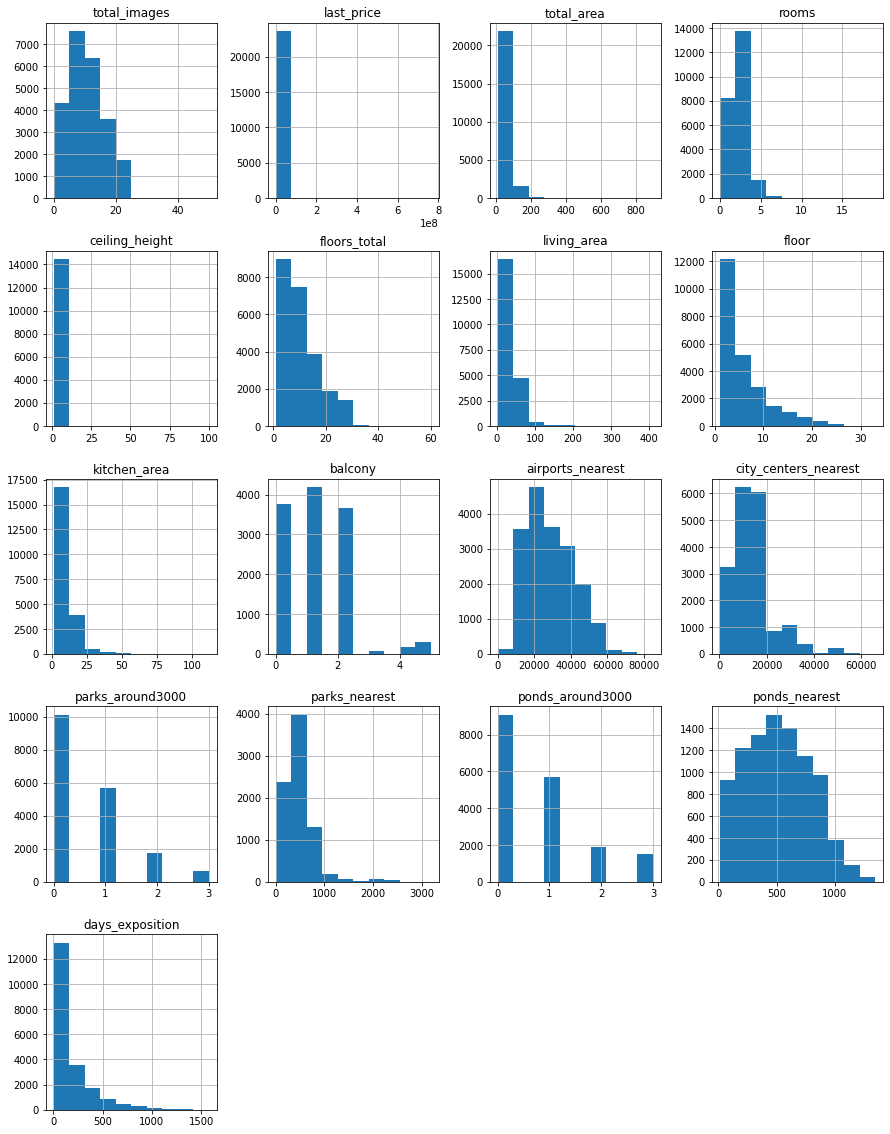

In [6]:
data.hist(figsize=(15,20))

### Предобработка данных

#### Работа с пропусками

##### Определим, в каких столбцах есть пропуски

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

##### Заполним пропущенные значения

###### Столбец `balcony`

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет.
Такие пропуски правильно заменить на 0:

In [8]:
data['balcony'] = data['balcony'].fillna(0)

###### Столбец `is_apartment`

В объявлениях это поле могло остаться незаполненным, возможно не все продавцы различают "апартаменты" и обычную квартиру, поэтому заполним все пропуски значениями False по умолчанию.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

###### Столбец `kitchen_area`

Логично предположить, что в объявлениях часто не указывают площадь кухни, если она не выделена в отдельную комнату: в квартирах со свободной планировкой и в квартирах-студиях.
Площадь кухни в этом случае входит в состав общей жилой площади.

In [10]:
data['kitchen_area'].where((data['kitchen_area'].isna()) & (data['studio']),0)
data['kitchen_area'].where((data['kitchen_area'].isna()) & (data['open_plan']),0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23694    0.0
23695    0.0
23696    0.0
23697    0.0
23698    0.0
Name: kitchen_area, Length: 23699, dtype: float64

###### Столбец `living_area` , оставшиеся пропуски в  столбце `kitchen_area` 

В некоторых объявлениях продавцы указали общую площадь объекта недвижимости, но не указали ее распределение на жилую/нежилую, и площадь кухни. Для таких объявлений мы заполним отсутствующую информацию медианными значениями, через коэфициент, отражающий медианную долю кухни/жилой площади в общей площади квартиры.

In [11]:
#К-т доли жилой площади в общей площади квартиры (рассчитанный по медианным значениям):
k_median_living_area = data['living_area'].median() / data['total_area'].median()
#К-т доли площади кухни в общей площади квартиры (рассчитанный по медианным значениям):
k_median_kitchen_area = data['kitchen_area'].median() / data['total_area'].median()

Применим полученные коэфициенты, чтобы заполнить пропуски.

In [12]:
data['living_area'] = data['living_area'].fillna(k_median_living_area*data['total_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(k_median_kitchen_area*data['total_area'])

###### Столбец `ceiling_height`

Аналогичным образом поступим с пропусками информации о высоте потолков. Многие продавцы, видимо, сочли эту информацию не важной, и около 1 /3 всех объявлений не содержат этой информации. Заполним пропуски в этом поле медианными значениями для каждого значения этажности по информации из нашего датасета.

In [13]:
# Нужно заменить пропуски в столбце на медианные значения. 
data.loc[data['ceiling_height'].isnull(), 'ceiling_height'] = data['ceiling_height'].median()
#data.loc[data['days_exposition'].isnull(), 'days_exposition'] = data['days_exposition'].median()- не верное решение

In [14]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Так как половина пропусков находится в промежутке до 95 дней (3-х месяцев), а 75% пропусков до 8 месяцев, то можно предположить, что пропуски в данных говорят о том, что объявления все еще актуальны.
и заполнять их не стоит.

In [15]:
# код ревьюера 
import datetime as dt

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_year'] = data['first_day_exposition'].dt.year
data[data['days_exposition'].isnull()].pivot_table(columns = 'first_day_year', values = 'total_area', aggfunc = 'count')

first_day_year,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,959,1796


##### Удаление строк с неполными данными

В некоторых случаях, мы имеем строки с неполными данными. Когда таких строк в датафрейме не очень много и они не оказывают существенного влияния на результаты исследования, их проще удалить, чем пытаться исправить.

Например, некоторые респонденты не заполнили информацию о квартире, которая представляет для нашего исследования существенный интерес: высоту потолков в квартире, площадь кухни, количество этажей в доме и т.п.
Такие строки малоинформативны и не представляют особого интереса.

В то же время, некоторая информация в этих строках вполне возможно нам еще пригодится (например, для расчета средних или медианных значений, для рассчета доли категориальных показателей и т.п.) Поэтому, на данном этапе, такие строки будут только "помечены на удаление", а удалены позже, непосредственно перед этапом исследовательского анализа данных.

In [16]:
# Столбец 'floors_total' содержит в себе количество этажей в здании, где продается объект. 
# Содержит в себе пустые значения. Скорее всего может продаваться отдельно дом, поэтому внесли пустые значения.
# Заменим их на 1.

data['floors_total'] = data['floors_total'].fillna(1)

###### Столбец `locality_name`

Информация о местонахождении объекта недвижимости - одна из ключевых. Но в 49 записях она пропущена, и восстановить ее из других источников не представляется возможным. Такие записи проще всего удалить.

In [17]:
data= data.dropna(subset=['locality_name']) 

Пропуски в столбцах parks_around_3000 и ponds_around_3000 заполним нулевым значением (так же, как поступили, рассуждая о количестве балконов) и приведем к цельночисленному формату.

In [18]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
first_day_year              0
dtype: int64

Сведения о расстоянии до ближайшего пруда или парка нам не доступны, оставляем пропуски.

airports_nearest, city_centers_nearest

Как мы видим, в данных о расстоянии до центра города так же есть пропуски. С учетом того, что эта часть информации была получена автоматически, на основании картографических данных, считем правильным не заполнять ее никакими расчетами самостоятельно, а оставить как есть.

#### Проверяем тип данных в столбцах

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

Еще раз посмотрим на общую информацию датафрейма, которую мы выводили методом df.info(), особенно пристальное внимание обращая на тип данных столбца (особенно, если он object)

In [20]:
data['balcony'] = data['balcony'].astype('int')

In [21]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Обработка дубликатов

##### Обработка явных дубликатов

In [22]:
data.duplicated().sum()

0

Проверка явных дубликатов показала, что в датасете отсутствуют повторяющиеся строки

##### Обработка неявных дубликатов в столбце `locality_name`

Посмотрим, сколько уникальных названий населенных пунктов в нашем датасете:

In [23]:
len(data['locality_name'].dropna().unique())

364

In [24]:
presorted_local_name = set(data['locality_name'].unique())
display(presorted_local_name)

{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

В целях унификации заменим все буквы "ё" на "е". В некоторых названиях содержится 2 буквы "ё", например: 'посёлок Молодёжное'. Больше, чем две "ё" (а также заглавные "Ё") в названиях населенных пунктов отсутствуют.

In [25]:
data.locality_name = data.locality_name.str.replace(
    'ё', 'е') #замена буквы "ё" на "е"
data.locality_name = data.locality_name.str.replace(
    'поселок городского типа', 'поселок') # замена на однотипные значнеия
data.locality_name = data.locality_name.str.replace(
    'городской поселок', 'поселок') # замена на однотипные значнеия

sorted_locality_name = set(data['locality_name'].unique()) #уникальные значения в алфавитном порядке

Избавимся от неявных дубликатов в названиях

In [26]:
len(sorted_locality_name) #кол-во уникальных значений после удаления дубликатов

322

In [27]:
sorted_locality_name #проверка

{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

#### Поиск и устранение редких и выбивающихся значений

##### Столбец `ceiling_height` (высота потолков)

Посмотрим на общую информацию в столбце "высота потолков"

In [28]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

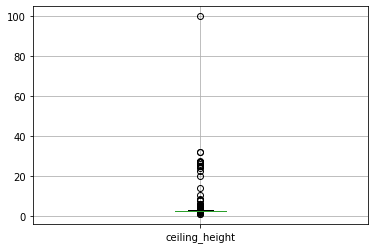

In [29]:
#На графике видно, что потолки высотой 100 метров - это очень выбивающееся значение
data.loc[:,['ceiling_height']].boxplot() 

Для квартир с высотой потолков от 20 метров предполагаем, что это опечатка и делим на 10, получая от 2-х метров.

In [30]:
data.update(data[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 100)]['ceiling_height']/10)

Итак, теперь мы знаем, что датафрейм содержит объявления о продаже недвижимости в Санкт-Петербурге и области за период с ноября 2014 по начало мая 2019 годов.

Мы убрали артефакты, частично заполнили пропуски в даннах, изменили формат столбцов и даже категоризировали наши объявления, выявив три группы (апартаменты, элитные квартиры и квартиры бизнес-класса и ниже).

In [31]:
#Посмотрим еще (после удаления) раз на типы данных в столбцах нашего датафрейма:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

Как мы видим, из датафрейма исчезло 49 строк, что составляет меньше 1% от общего количества строк. 

### Посчитайте и добавьте в таблицу новые столбцы

**Добавление цены квадратного метра**

In [32]:
data['price_per_meter'] = data['last_price'] / data['total_area']/1000

In [33]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,price_per_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019,120.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,82.920792
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,92.785714
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,91.730769,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015,408.176101
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018,100.000000


#### День недели публикации объявления

In [34]:
#Добавим в датафрейм с данными столбец с днями недели:
data['weekday'] = data['first_day_exposition'].dt.weekday
sorted(data['weekday'].unique())

[0, 1, 2, 3, 4, 5, 6]

#### Месяц публикации объявления

In [35]:
#Добавим в датафрейм с данными столбец с днями недели:
data['month'] = data['first_day_exposition'].dt.month
sorted(data['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#### Год публикации объявления

In [36]:
data['year'] = data['first_day_exposition'].dt.year
sorted(data['year'].unique())

[2014, 2015, 2016, 2017, 2018, 2019]

#### Тип этажа квартиры

In [37]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_id'] = data.apply(floor, axis=1)

In [38]:
#Проверим результат:
data.loc[:13,['floor_id','floor','floors_total']]

,floor_id,floor,floors_total
0,другой,8,16.0
1,первый,1,11.0
2,другой,4,5.0
3,другой,9,14.0
4,другой,13,14.0
5,другой,5,12.0
6,другой,6,26.0
7,другой,22,24.0
8,другой,26,27.0
9,другой,7,9.0


#### Расстояние до центра города в километрах

In [39]:
#Добавим в датафрейм новый столбец с расстоянием до центра города в км:
data.insert(18, 'city_centers_nearest_km', round((data['city_centers_nearest'] / 1000),0), False)

In [40]:
#Проверим результат:
data.loc[:5,['city_centers_nearest_km','city_centers_nearest']]

,city_centers_nearest_km,city_centers_nearest
0,16.0,16028.0
1,19.0,18603.0
2,14.0,13933.0
3,7.0,6800.0
4,8.0,8098.0
5,NaN,NaN


### Проведите исследовательский анализ данных

#### Исследуем основные параметры объектов

##### Столбец 'total_area', общая площадь

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

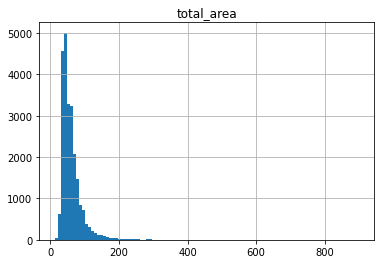

In [41]:
data.hist('total_area', bins=100)

Большинство квартир на рынке недвижимости имеют площадь в пределах от 30 до 80 кв.м.

##### Столбец 'living_area', жилая площадь

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

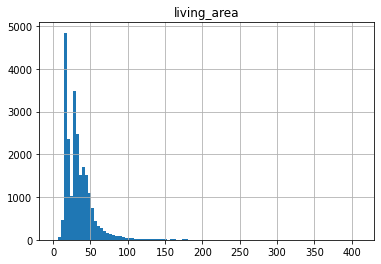

In [42]:
data.hist('living_area', bins=100)

Кривая диаграммы жилой площади повторяет по форме диаграмму общей площади, поскольку жилая площадь меньше общей площади

##### Столбец 'kitchen_area', площадь кухни

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

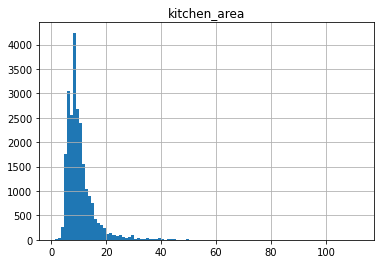

In [43]:
data.hist('kitchen_area', bins=100)

При средней площади кухни в 10 метров, только самые топовые по цене объекты недвижимости могут похвастаться кухней больше 10 м.
Лишь у 10% кухня приближается по размеру к 20 м2.

##### Столбец 'last_price', цена объекта

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

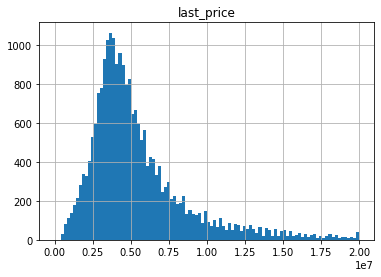

In [44]:
data.hist('last_price', bins=100, range=(0,2e+07))

##### Столбец 'rooms', количество комнат

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

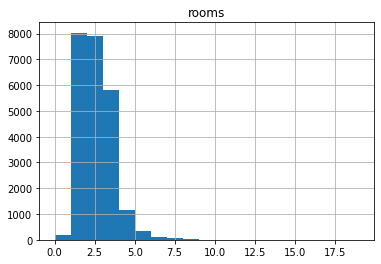

In [45]:
data.hist('rooms', bins=data['rooms'].max())

##### Столбец 'ceiling_height', высота потолков

<AxesSubplot:>

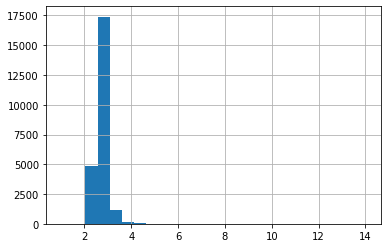

In [46]:
data['ceiling_height'].hist(bins=25)

Средняя высота потолков от 2,5 до 3 метров

##### Столбец 'floor', этаж квартиры

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

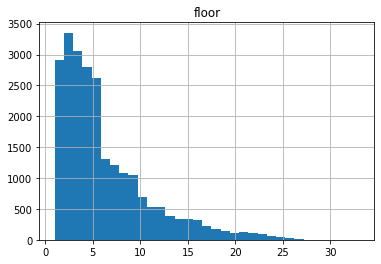

In [47]:
data.hist('floor', bins=data['floor'].max())

Чаще всего к продаже предлагаются 2-4 этажи.

##### Столбец 'floor_id', тип этажа квартиры

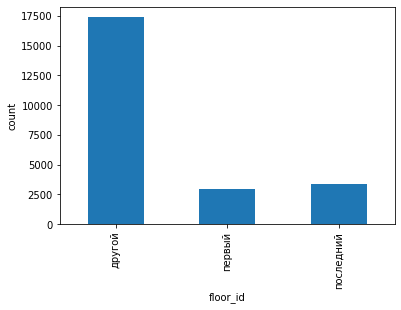

In [48]:
data.groupby(by='floor_id')['floor_id'].count().plot(kind='bar', ylabel = 'count');

меньше всего квартир на крайних этажах, что в принципе логично

##### Столбец 'floors_total', общее количество этажей в доме

<AxesSubplot:>

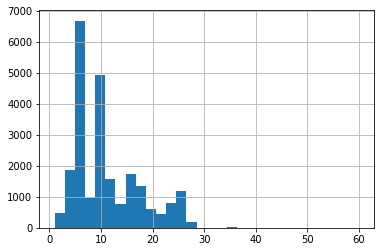

In [49]:
data['floors_total'].hist(bins=30)

В основном на рынке преобладают серии домов с 5-ти и 9-ти этажной застройкой.

##### Столбец 'city_centers_nearest', расстояние до центра города в метрах

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

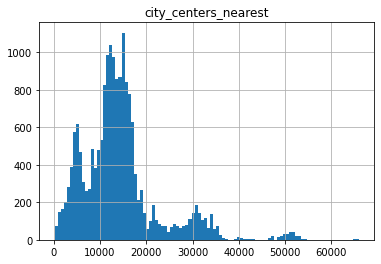

In [50]:
data.hist('city_centers_nearest', bins=100)

##### Столбец 'airports_nearest', расстояние до ближайшего аэропорта

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

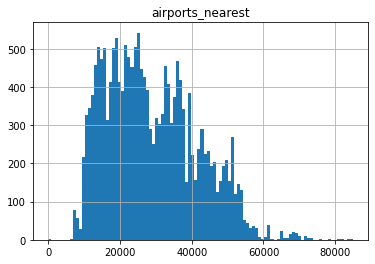

In [51]:
data.hist('airports_nearest', bins=100)

##### Столбец 'parks_nearest', расстояние до ближайшего парка

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

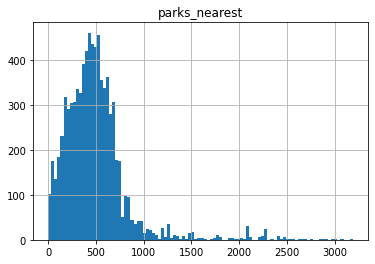

In [52]:
data.hist('parks_nearest', bins=100)

А вот с расстоянием до парковых зон - картина прямо противоположная. Оно и понятно - чем дальше от центра города, тем больше парковых зон.

##### Столбец 'weekday', день публикации объявления

<AxesSubplot:>

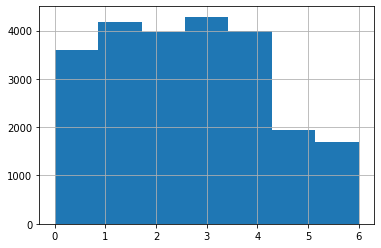

In [53]:
data['weekday'].hist(bins=7)

Как правило, объявления люди размещают в будние дни.

##### Столбец 'month', месяц публикации объявления

<AxesSubplot:>

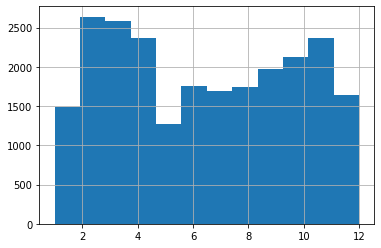

In [54]:
data['month'].hist(bins=12)

В преддверии и сразу после начала года люди реже размещают объявления. Также определенный спад прослеживается в летние месяцы.

#### Как быстро продавались квартиры?

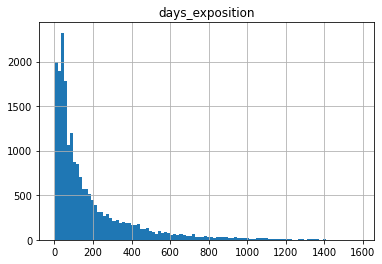

In [55]:
data.hist('days_exposition', bins=100);

На первый взгляд, форма распределения похожа на типичное распределение Пуассона.

In [56]:
(f'Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))

('Среднее время продажи квартиры в днях:', 180)

In [57]:
('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median()))

('Медианное время продажи квартиры в днях:', 95)

<AxesSubplot:>

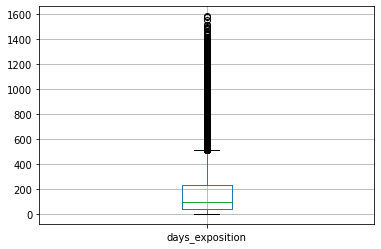

In [58]:
#Посмотрим "ящик с усами" для столбца 'days_exposition'
data.loc[:,['days_exposition']].boxplot() 

<AxesSubplot:>

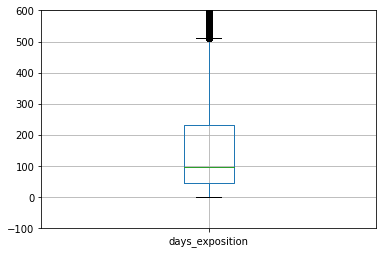

In [59]:
#Посмотрим "ящик с усами" для столбца 'days_exposition' в чуть более увеличенном масштабе:
plt.ylim(-100, 600)
data.loc[:,['days_exposition']].boxplot() 

Нижний "ус" отсекает множество на уровне нуля. Это означает, что нижняя граница скорости продаж вписывается в нормальные значения. Что же касается верхней границы - всё, что касается продаж чуть выше 500 дней, является статистическими выбросами. Это "ненормальная" продолжительность продаж, и для выводов о "нормальной" продолжительности продаж такие случаи нам не нужны. От них лучше избавиться.

Сформулируем верхнюю границу выбросов чуть менее радикально. Скажем так: квартиры, которые продаются на рынке более полутора лет, являются скорее существенным отклонением от нормы по скорости продаж.

In [60]:
#Посмотрим, сколько таких квартир:
print(len(data.loc[data['days_exposition']>365*1.5]),' из ', len(data))

1483  из  23650


Долгопродающиеся квартиры - это около 6% от общей массы объявлений. Довольно существенная доля, однако влияние на качество анализа, которое данные объекты оказывают, скорее отрицательное. Они сильно искажают на статистические показатели скорости продаж. Удалим их.

In [61]:
data = data.loc[data['days_exposition']<365*1.5]

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

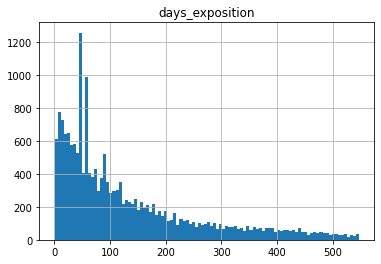

In [62]:
#Посмотрим теперь на гистограмму столбца 'days_exposition'
data.loc[:,['days_exposition']].hist(bins=100)

На гистограмме есть несколько пиков, которые явно выбиваются из общего тренда. Можно посмотреть, какие сроки продажи являются фаворитами по количеству повторений.

In [63]:
data['days_exposition'].value_counts().head(10)

45.0    879
60.0    538
7.0     234
30.0    208
90.0    203
4.0     174
3.0     158
5.0     152
14.0    148
9.0     142
Name: days_exposition, dtype: int64

Наиболее частая продолжительность продаж носит слишком уж системный характер: неделя, месяц, полтора/два/три месяца. Судя по всему, это не продолжительность продажи, а некоторые сроки, в которые объявление должно было быть снято или продлено (например 95, 45, 60 7, 30, 90, 14 дней.) В условиях размещения объявлений в Яндекс.Недвижимости - https://yandex.ru/support/realty/owner/home/add-ads-housing.html как раз и указаны данные сроки. Следовательно строки с данной продолжительностью продаж искажают информацию о реальной продолжительности размещения объявления до момента продажи. Почистим наш датасет от таких строк. 

In [64]:
data = data.query('days_exposition != [7,14,30,45,60,90]')

In [65]:
data.query('days_exposition == 45')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,price_per_meter,weekday,month,year,floor_id


In [66]:
data.query('45<days_exposition<46')['days_exposition'].unique()

array([45.])

In [67]:
data.query('days_exposition == 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,price_per_meter,weekday,month,year,floor_id


In [68]:
data.query('7<days_exposition<8')['days_exposition'].unique()

array([], dtype=float64)

In [69]:
data.query('days_exposition == 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,price_per_meter,weekday,month,year,floor_id


In [70]:
data.query('60<days_exposition<61')['days_exposition'].unique()

array([], dtype=float64)

In [71]:
data.query('days_exposition == 90')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year,price_per_meter,weekday,month,year,floor_id


In [72]:
data.query('90<days_exposition<91')['days_exposition'].unique()

array([90.])

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

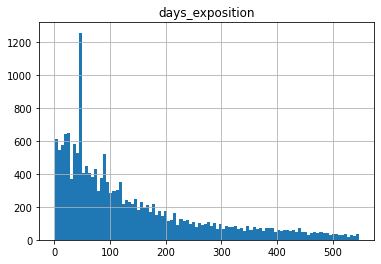

In [73]:
#Посмотрим теперь на гистограмму столбца 'days_exposition'
data.loc[:,['days_exposition']].hist(bins=100)

In [74]:
data['days_exposition'].value_counts().head(10)

45.0    879
90.0    203
4.0     174
3.0     158
5.0     152
9.0     142
20.0    139
8.0     139
44.0    138
11.0    135
Name: days_exposition, dtype: int64

Мы очистили наши данные от случайны и систематических ошибок и статистических выбросов и аномалий. Разобъем наш датасет на три равные части по вариативности сроков продаж:

In [75]:
data = data.query('days_exposition<45 or 46<days_exposition<60 or 61<days_exposition<90 or 91<days_exposition')


<AxesSubplot:>

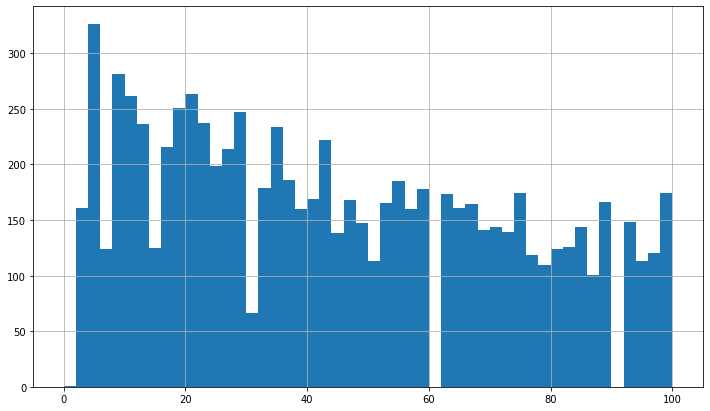

In [76]:
data['days_exposition'].hist(bins=50, range=(0,100), figsize=(12, 7))

Разобъем наш датасет на три равные части по вариативности сроков продаж:

In [77]:
data['days_exposition_type'] = pd.qcut(data['days_exposition'], q=3, labels=['быстро','нормально','медленно'], precision=0, duplicates='drop')

In [78]:
data.pivot_table(index='days_exposition_type', values='days_exposition', aggfunc='max')

,days_exposition
days_exposition_type,
быстро,59.0
нормально,164.0
медленно,547.0


Продажа квартиры в течении двух месяцев считается быстрой; нормальной продолжительностью продажи является срок от двух до шести месяцев; от полугода до полутора лет - долго, но в пределах нормы. Однако не не редки случаи, когда объект недвижимости продается и более полутора лет. Такие случаи на рынке недвижимости являются отклонением от общего правила, но также встречаются на практике.

Факторы больше всего влияющие на общую стоимость объекта?

Для анализа влияния факторов на цену объекта недвижимости, построим матрицу диаграмм рассеяния для каждого из факторов, чтобы визуально оценить наличие связи между ценой и каждым из факторов (первый столбец матрицы).

In [79]:
#Запишем перечень факторов в переменную `list`.
#Первой укажем цену, тогда первый столбец матрицы покажет нам цависимость цены от каждого из факторов.
list=(['last_price',# цена объекта
       'total_area',# общая площадь
       'living_area',# жилая площадь
       'kitchen_area',# площадь кухни
       'rooms',# количество комнат
      ])

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_pric

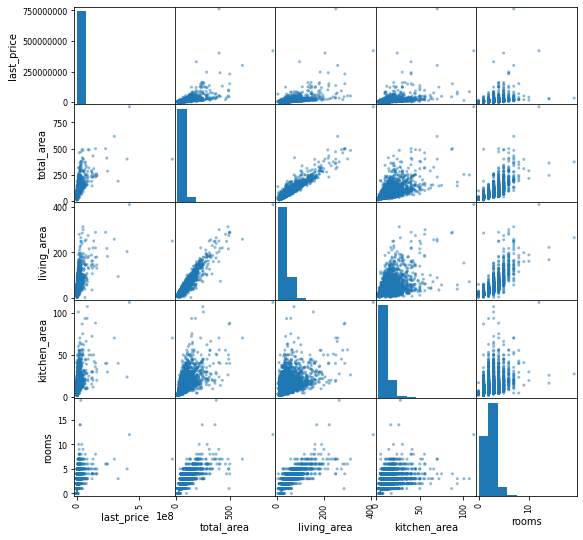

In [80]:
pd.plotting.scatter_matrix(data.loc[:,list], figsize=(9, 9))

Также построим матрицу коэффициентов корреляции, для каждого из параметров:

In [81]:
data.loc[:,list].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.629300,0.559613,0.479592,0.339924
total_area,0.629300,1.000000,0.940552,0.646132,0.756837
living_area,0.559613,0.940552,1.000000,0.478309,0.832929
kitchen_area,0.479592,0.646132,0.478309,1.000000,0.306866
rooms,0.339924,0.756837,0.832929,0.306866,1.000000


Как видно из приведенных выше данных, первые три фактора (общая площадь, жилая площадь, площадь кухни) оказывают значительное влияние на цену. Общая и жилая площадь, помимо этого, тесно связаны между собой (что вполне логично).

Количество комнат также оказывает влияние на цену, хотя заметно менее существенное.

Скорее, результаты анализа следует интерпретировать следующим образом:

На цену объекта недвижимости оказывает существенное влияние его общая площадь. Влияние, которое оказывают прочие характеристики объекта недвижимости (жилая площадь, площадь кухни, количество комнат) является следствием того, что между данными факторами и общей площадью существует прямая корреляция, а поэтому они показывают также корреляцию и с ценой.

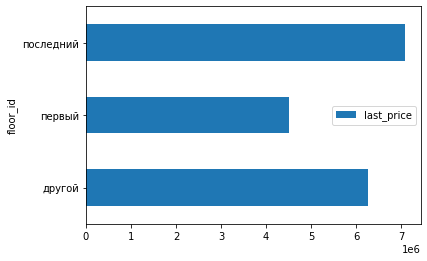

In [82]:
data.pivot_table(index='floor_id',values='last_price').plot(y='last_price', kind='barh');

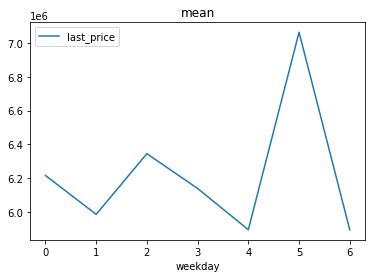

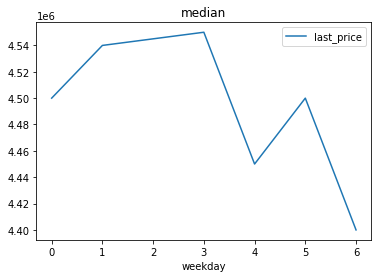

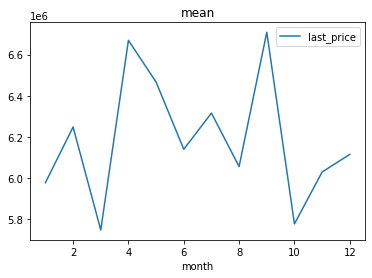

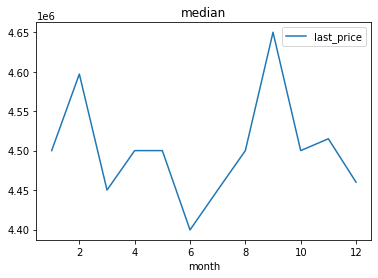

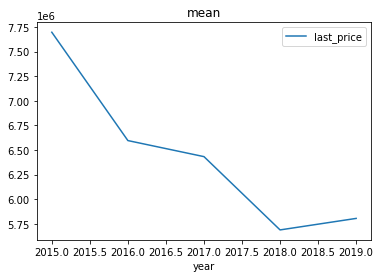

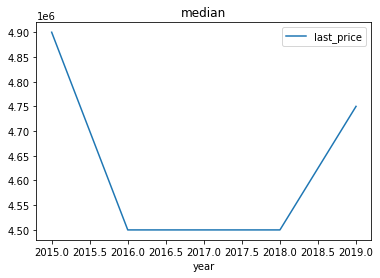

In [83]:
data.pivot_table(index='weekday',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='weekday',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='month',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

Как мы видим, стоимость продаж резко падала до 2016 года, и только в 2018 году начался рост.
В первую половину недели размещаются объявления с более высокой стоимостью, пик приходится на четверг.
В течание года на цену влияет сезонность: затишье с апреля до конца лета, максимальные - в сентябре и на конце года. ___

In [84]:
#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [85]:
#Сначала отберем 10 населенных пунктов с наибольшим числом объявлений, и запишем список в переменную top_10:
top_10 = data['locality_name'].value_counts().index[0:10]
top_10

Index(['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск',
       'Колпино', 'Пушкин', 'поселок Парголово', 'деревня Кудрово', 'Гатчина',
       'Выборг'],
      dtype='object')

In [86]:
#Посмотрим среднюю цену в каждом из населенных пунктов списка из Топ-10:
(data
     .query('locality_name in @top_10')
     .pivot_table(index='locality_name', values='price_per_meter', aggfunc='mean')
     .sort_values(by='price_per_meter',ascending=False))

,price_per_meter
locality_name,
Санкт-Петербург,111.697077
Пушкин,102.237006
деревня Кудрово,92.438790
поселок Парголово,89.359412
поселок Мурино,85.672299
поселок Шушары,78.208960
Колпино,74.841284
Всеволожск,68.886205
Гатчина,67.423288


Определим самую высокую и самую низкую цену квадратного метра, усредненную по каждому населенному пункту:

In [87]:
min_price = data.groupby('locality_name')['price_per_meter'].mean().min()
max_price = data.groupby('locality_name')['price_per_meter'].mean().max()

Посмотрим, в каком населенном пункте самые низкие цены на недвижимость:

In [88]:
data.pivot_table(index='locality_name', values='price_per_meter', aggfunc='mean').query('price_per_meter == @min_price')

,price_per_meter
locality_name,
деревня Старополье,11.309332


Посмотрим, в каком населенном пункте самые высокие цены на недвижимость:

In [89]:
data.pivot_table(index='locality_name', values='price_per_meter', aggfunc='mean').query('price_per_meter == @max_price')

,price_per_meter
locality_name,
Санкт-Петербург,111.697077


Как и следовало ожидать, лидером по количеству объявлений является основная агломерация - Санкт-Петербург. Минимальные цены обнаружены в одной из деревень - тоже вполне ожидаемо. Неожиданным лидером по средней цене квадратного метра оказался Зеленогорск: зелень, горы - видимо, экология имеет значение

In [90]:
#### Квартиры в Санкт-Петербурге

<AxesSubplot:xlabel='km'>

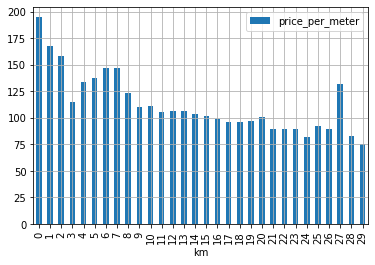

In [91]:
#столбчатую диаграмму со значением средней цены для каждого из километра:
SPb = (data[data['locality_name'] == 'Санкт-Петербург']
       .pivot_table(index='city_centers_nearest_km', values='price_per_meter', aggfunc='mean'))
SPb['km'] = SPb.index.astype('int')
SPb.plot( x='km', y='price_per_meter', kind='bar', grid=True)

Зависимость цены квадратного метра от расстояния от центра города прослеживается на графике довольно явно

Если устранить выбросы, которые в определенном количестве есть на каждом километре, зависимость будет по всей видимости еще более явной.

Резкий всплеск на 27 километре связан с малым количеством наблюдений, из которых одно является, по всей видимости, аномально высоким для данного участка или возможно это особый элитный район в городе.
Анализ влияния удаленности от центра города на стоимость недвижимости на примере Санкт-Петербурга показал, что это влияние довольно существенное (корреляция на уровне 80 %), и по мере удаленности от центра города цена квадратного метра недвижимости падает довольно значительно. Эта тенденция особенно заметна вбизи центра, и сохраняется по мере удаления. Однако темпы падения цены квадратного метра по мере удаления от центра замедляются, что говорит о нелинейном характере этой зависимости.

### Общий вывод

Мы узнали очень много о рынке недвижимости, провели предобработку данных и построили графики по данным, полученным в результате.
Исследование было посвящено объявлениям о продажах квартир.

Работы:
1. Была получена первоначальная информация по датасету.
  - Обнаружены пропуски в датасете. 
  - Кол-во столбцов с пропусками 14 (всего в датасете 22 столбца).
  - Явных дубликатов в датаесете не было обнаружено. 
  - Замечены аномалии, к примеру, минимальное значение потолка 1 метр, а максимальное 100 метров.
2. Найдены пропуски, дубликаты и аномалии в датасете. Была проведена работа по заполнению пропусков, удаление ненужных строк из датасета. Аномалии и дубликаты обработаны.
  - Заменены неявные дубликаты (раньше названия населенных пунктов повторялись из-за разной записи е-ё и так далее).
  - Столбец с датой приведен к округленному до дней и правильному форматам. 
  - Пропуски в столбце с высотой потолков заменены на медиану. 
  - Убраны пропуски в столбце living_area. 
  - Замена на булев тип данных в столбцах, где это необходимо. 
  - Пропуски в kitchen_area медианным значением. 
  - Пропуски в living_area медианным значением.
3. В датафрейм добавлены новые показатели: 
  - отношение кухни и жилой площади к общей площади помещения, 
  - цена за кв метр, 
  - день, месяц и год публикации объявлений, 
  - категория этажа.
  - Общая площадь:
    - Данные распределены нормально, есть выбросы но они не сильно влияют на данные.
  - Цена:
    - Данные также распределены нормально, видны выбросы, но они также не сильно влияют на результат, общая картина ясна.
  - Число комнат:
    - Большое кол-во объявлений – это квартиры с 1 или 2 комнатами. Квартир с 7 комнатами как и ожидалось меньше всех. Распределение нормальное.
  - Высота потолков:
    - Выбросы не сильно влияют на распределение. Данные нормальные и представляют собой понятную картину относительно высоты потолков.
- Время продаж в основном приходится на 2017 и 2018 год (немного больше 8000 объявлений).


- Среднее значение длительности размещения квартиры на площадке Яндекса равняется 169 дням, а медиана равна 95 дням. Выявлены выбивающиеся значения. Аномалии находятся на 45, 60, 7, 30, 90 днях. Данные аномалии связаны с тем, что сроки публикации на яндексе соответсвуют этим дням.

4. Сделаны графики соотношений цены к другим показателям квартир
  - Чем больше площадь помещения, тем выше цена.
  - цена варьируется от месторасположения квартиры. Цены в диапазоне от 0 до 10 км варьируются от примерно 30 тысяч до 500 тысяч за квадратный метр, от 10 км до 20 км такие большие значения цены уже не встречаются (в основном от 50 тыс до 150 тыс руб), чем квартира дальше от центра, тем меньше стоимость квадратного метра. В датасете есть и аномалии, к примеру, квартира, находящаяся более чем в 50 км от города имеет цену больше 300 тысяч рублей за квадратный метр. Кол-во аномалий небольшое. 
  - Первый этаж является самым дешевым. Последние этажи дороже первых, но обычно не намного. Дорогими являются другие этажи. 
  - Четкой взаимосвязи между днем недели и ценой объекта нет, можно разве что утверждать, что в воскресенье цена на объект ниже, чем в любой другой день.
  - Зависимости между ценой и днем публикации нет, данные сильно разнятся, четких закономерностей не обнаружено.
  - Зависимость между месяцами и ценой объекта также не выявлена, но можно утверждать, что в июне квартиры выставляются по меньшей цене, чем в остальные месяцы.
  - В 2016, 2017 и 2018 году цены на квартиры были гораздо ниже, чем в 2015 или в 2019 году. Корреляция не обнаружена между показателями "цена" и "год". Нет линейной зависимости, влияют внешние факторы.
5. Выявлен топ 10 населенных пунктов по кол-ву объявлений. 

* самые дешевые объекты находятся в деревне Старополье
* самые дорогие объекты находятся в поселке Зеленогорск
6. Сделан анализ квартир, находящихся в центре Санкт-Петербурга